## Analog vs Digital

In [18]:
!du -csh duygu_test.wav

5.6M	duygu_test.wav
5.6M	total


In [19]:
!du -csh duygu_test.mp3

780K	duygu_test.mp3
780K	total


In [20]:
! ffmpeg -i duygu_test.wav

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [21]:
! ffmpeg -i duygu_test.mp3

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

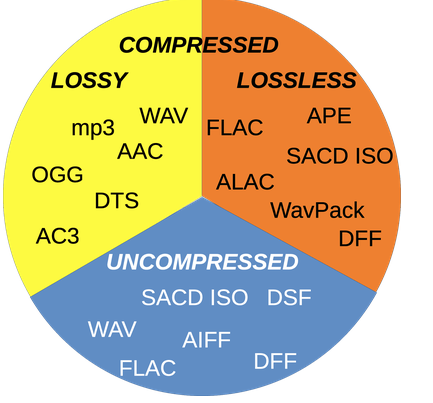

In [46]:
from IPython.display import Image
Image(filename='codecs.png') 

### Processing audio data woth TorchAudio

In [3]:
import torchaudio
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
waveform, sample_rate = torchaudio.load(filepath="duygu_test.wav")

In [4]:
waveform.size()

torch.Size([2, 1462356])

In [5]:
sample_rate

44100

In [6]:
waveform[0]

tensor([ 6.1035e-05,  1.8311e-04,  1.5259e-04,  ..., -6.1035e-05,
        -1.2207e-04, -1.5259e-04])

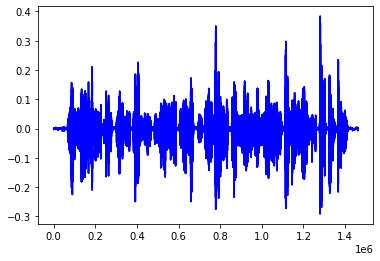

In [28]:
plt.figure()
plt.plot(waveform.t().numpy(), color="blue")

#### A bit of transforming

In [48]:
new_sample_rate = sample_rate/10

In [49]:
channel = 0
waveform_transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

In [50]:
new_sample_rate, waveform_transformed.shape

(4410.0, torch.Size([1, 146420]))

In [52]:
waveform_transformed[0,:]

tensor([ 0.0000,  0.0000,  0.0000,  ..., -0.0009, -0.0008, -0.0004])

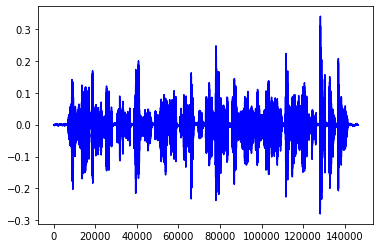

In [53]:
plt.figure()
plt.plot(waveform_transformed[0,:].t().numpy(), color="blue")

#### Spectrogram

In [54]:
spectrogram = torchaudio.transforms.Spectrogram()(waveform[0,:])

In [55]:
spectrogram.shape

torch.Size([201, 7321])

In [59]:
spectrogram[0]

tensor([0.0000, 0.0000, 0.0000,  ..., 0.0529, 0.0532, 0.0812])

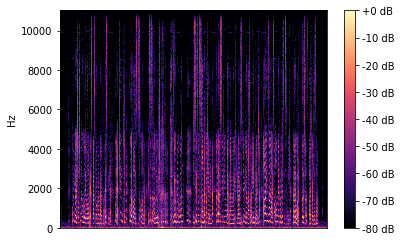

In [8]:
plt.figure()
y, sr = librosa.load("duygu_test.wav")
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')

#### Mel spectrogram

In [64]:
 mel_spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate)(waveform[0,:])

/usr/local/lib/python3.8/dist-packages/torchaudio/functional/functional.py:594: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [65]:
mel_spectrogram.size()

torch.Size([128, 7321])

In [73]:
mel_spectrogram[120]

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 5.6437e-06, 4.1351e-06,
        1.3236e-05])

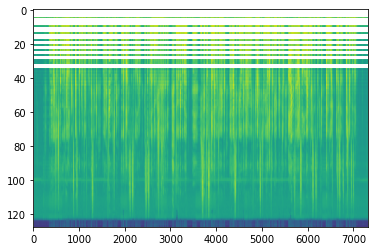

In [66]:
plt.figure()
plt.imshow(mel_spectrogram.log2().numpy(), cmap='viridis', aspect="auto")

#### MFCC

In [69]:
mfcc_spectrogram = torchaudio.transforms.MFCC(sample_rate= sample_rate)(waveform[0,:])

In [70]:
mfcc_spectrogram.size()

torch.Size([40, 7321])

In [71]:
mfcc_spectrogram[0]

tensor([-635.0498, -635.0498, -635.0498,  ..., -609.6249, -565.9091,
        -457.7511])

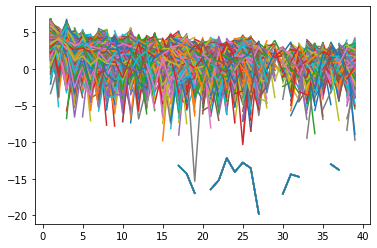

In [79]:
plt.figure()
plt.plot(mfcc_spectrogram.log2().numpy())
plt.draw()

In [63]:
dir(torchaudio.transforms)

['AmplitudeToDB',
 'Callable',
 'ComplexNorm',
 'ComputeDeltas',
 'F',
 'Fade',
 'FrequencyMasking',
 'GriffinLim',
 'InverseMelScale',
 'InverseSpectrogram',
 'LFCC',
 'MFCC',
 'MVDR',
 'MelScale',
 'MelSpectrogram',
 'MuLawDecoding',
 'MuLawEncoding',
 'Optional',
 'PSD',
 'PitchShift',
 'RNNTLoss',
 'Resample',
 'SlidingWindowCmn',
 'SpectralCentroid',
 'Spectrogram',
 'Tensor',
 'TimeMasking',
 'TimeStretch',
 'Vad',
 'Vol',
 '_AxisMasking',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_apply_sinc_resample_kernel',
 '_get_mat_trace',
 '_get_sinc_resample_kernel',
 'math',
 'torch',
 'warnings']

In [67]:
dir(torchaudio)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_extension',
 '_internal',
 '_torchaudio',
 'backend',
 'compliance',
 'datasets',
 'functional',
 'get_audio_backend',
 'git_version',
 'info',
 'kaldi_io',
 'list_audio_backends',
 'load',
 'models',
 'pipelines',
 'save',
 'set_audio_backend',
 'sox_effects',
 'transforms',
 'utils',
 'version']